
# ASSIGNED CSTR with multiple reactions

The reactions

\begin{align}
A + B \rightarrow C \\
A + C \rightarrow D
\end{align}

take place in a CSTR. It is known that $r_1 = 14.19 C_A C_B$ kmol/m$^3$/ksec and $r_2=2.31 C_A C_C$ kmol/m$^3$/ksec. A is fed at 40 kmol/ksec and B is fed at 20 kmol/ksec at an overall volumetric flow of 5 m$^3$/ksec. Show graphically if there is an optimal volume that maximizes the exit concentration of C and if there is find it.

Explain in words why there is or is not an optimal volume to maximize the concentration of C.




# solution

The easiest way to solve this problem is to create a parameterized objective function where volume is a parameter. That will allow you to solve the equation many times for different volumes easily.

The objective function is just a set of three mole balances for the CSTR, and we solve for the exit molar flows at the volume provided.

In [1]:
import numpy as np
from scipy.optimize import fsolve

k1 = 14.19
k2 = 2.31

Fa0 = 40.0
Fb0 = 20.0
Fc0 = 0.0

v0 = 5.0

def cstr(F, V):
    Fa, Fb, Fc = F

    Ca = Fa / v0
    Cb = Fb / v0
    Cc = Fc / v0

    r1 = k1 * Ca * Cb
    r2 = k2 * Ca * Cc

    ra = -r1 - r2
    rb = -r1
    rc = +r1 - r2

    z1 = Fa0 - Fa + ra * V
    z2 = Fb0 - Fb + rb * V
    z3 = Fc0 - Fc + rc * V
    return [z1, z2, z3]

Next, we need to solve the objective function for a range of volumes. We only need the concentration of C in this problem, which is the last element returned from fsolve.



Max Cc = 2.031 kmol/m^3 at V = 0.20 m^3


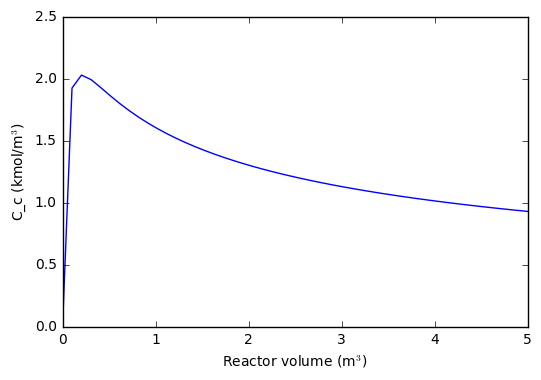

In [2]:
Vspan = np.linspace(0, 5)  # m^3

F0 = [2.0, 2.0, 15.0] # initial guesses

FC = np.array([fsolve(cstr, F0, args=(v,))[2] for v in Vspan])

Cc = FC/v0
imax = np.argmax(Cc)
print('Max Cc = {0:1.3f} kmol/m^3 at V = {1:1.2f} m^3'.format(Cc[imax], Vspan[imax]))

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(Vspan, Cc)
plt.xlabel('Reactor volume (m$^3$)')
plt.ylabel('C_c (kmol/m$^3$)')

We expect a maximum because C is initially produced by reaction one, leading to an increase, but eventually consumed by reaction 2. 0.2 m^3 might seem small, but it is not unreasonable, it is 200 L in volume.

# Alternate approach
It is not necessary to create a parameterized function. You could define the function inside a loop over the volume.

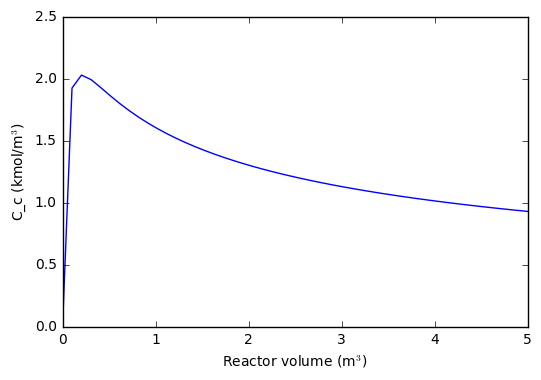

In [6]:
CC2 = []

for V in Vspan:
    # define the objective function at each value of V
    def cstr2(F):
        Fa, Fb, Fc = F

        Ca = Fa / v0
        Cb = Fb / v0
        Cc = Fc / v0

        r1 = k1 * Ca * Cb
        r2 = k2 * Ca * Cc

        ra = -r1 - r2
        rb = -r1
        rc = +r1 - r2

        z1 = Fa0 - Fa + ra * V
        z2 = Fb0 - Fb + rb * V
        z3 = Fc0 - Fc + rc * V
        return [z1, z2, z3]
    
    # Solve the function
    F = fsolve(cstr2, F0)
    CC2.append(F[2] / v0) # accumulate what you want
    
plt.plot(Vspan, CC2)
plt.xlabel('Reactor volume (m$^3$)')
plt.ylabel('C_c (kmol/m$^3$)')

It looks the same. It is another way to solve the problem.